In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from RandomForest import RandomForest
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
df=pd.read_csv('KDDTrain+.txt')
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
    ,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
    ,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
df.columns = columns

In [5]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

In [6]:
def normalisation(df, colName):
    dfMin=df[colName].min()
    dfMax=df[colName].max()
    df[colName]=(df[colName]-dfMin)/(dfMax-dfMin)

def oneHotEncoding(df, colName):
    dummies=pd.get_dummies(df[colName],dtype='int')
    for col in dummies.columns:
        col_name=f"{colName}_{col}"
        df[col_name]=dummies[col]
    df.drop(columns=colName,inplace=True)

In [7]:
normalisation(df, 'duration')
oneHotEncoding(df, 'protocol_type')
oneHotEncoding(df, 'service')
oneHotEncoding(df, 'flag')
normalisation(df, 'src_bytes')
normalisation(df, 'dst_bytes')
oneHotEncoding(df, 'land')
normalisation(df, 'wrong_fragment')
normalisation(df, 'urgent')
normalisation(df, 'hot')
normalisation(df, 'num_failed_logins')
oneHotEncoding(df, 'logged_in')
normalisation(df, 'num_compromised')
normalisation(df, 'root_shell')
normalisation(df, 'su_attempted')
normalisation(df, 'num_root')
normalisation(df, 'num_file_creations')
normalisation(df, 'num_shells')
normalisation(df, 'num_access_files')
oneHotEncoding(df, 'is_guest_login')
normalisation(df, 'count')
normalisation(df, 'srv_count')
normalisation(df, 'serror_rate')
normalisation(df, 'srv_serror_rate')
normalisation(df, 'rerror_rate')
normalisation(df, 'srv_rerror_rate')
normalisation(df, 'same_srv_rate')
normalisation(df, 'diff_srv_rate')
normalisation(df, 'srv_diff_host_rate')
normalisation(df, 'dst_host_count')
normalisation(df, 'dst_host_srv_count')
normalisation(df, 'dst_host_same_srv_rate')
normalisation(df, 'dst_host_diff_srv_rate')
normalisation(df, 'dst_host_same_src_port_rate')
normalisation(df, 'dst_host_srv_diff_host_rate')
normalisation(df, 'dst_host_serror_rate')
normalisation(df, 'dst_host_srv_serror_rate')
normalisation(df, 'dst_host_rerror_rate')
normalisation(df, 'dst_host_srv_rerror_rate')

df=df.copy()

C:\Users\maniv\AppData\Local\Temp\ipykernel_12456\3799565333.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name]=dummies[col]
C:\Users\maniv\AppData\Local\Temp\ipykernel_12456\3799565333.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col_name]=dummies[col]


In [8]:
df['attack_num'] = pd.Categorical(df['attack']).codes
df = df.drop(columns='attack')

In [9]:
df = df.sample(frac = 1)
train, test = train_test_split(df, test_size=0.1)

y_train = train['attack_num'].to_numpy()
X_train = train.drop(columns='attack_num').to_numpy()
y_test = test['attack_num'].to_numpy()
X_test = test.drop(columns='attack_num')
cols = X_test.columns
X_test = X_test.to_numpy()

In [17]:
clf = RandomForest()
clf.fit(X_train, y_train)

In [18]:
prediction = clf.predict(X_test)

**Accuracy**

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction, y_test))

0.9976980473090967


**Precision**

In [20]:
from sklearn.metrics import precision_score
print(precision_score(prediction, y_test, average="macro", zero_division=np.nan))

0.8300001141839335


**Recall**

In [21]:
from sklearn.metrics import recall_score
print(recall_score(prediction, y_test, average="macro", zero_division=np.nan))

0.789887675630377


**F1 score**

In [22]:
from sklearn.metrics import f1_score
print(f1_score(prediction, y_test, average="macro", zero_division=np.nan))

0.7098595972857787


In [23]:
clf.imp_features

[{0: 0.032905769895955256,
  1: 0.12235954080253929,
  2: 0.14472289325364676,
  3: 0.000666559111913179,
  4: 0.0002644153474354847,
  5: 0.00312188572281808,
  6: 0.0004033900112876546,
  7: 0.0019034573214336773,
  8: 0.0005847505806230312,
  9: 1.7258883510149586e-05,
  10: 0.0018699329726269399,
  11: 0.0016146498594073648,
  12: 0.0005428427581842309,
  13: 0.000470191498103571,
  14: 7.69449731617469e-09,
  15: 0.05553457914088376,
  16: 0.0376894561923663,
  17: 0.017224944028717857,
  18: 0.014022188347762896,
  19: 0.008381065321277876,
  20: 0.00735394770193879,
  21: 0.019739467539528658,
  22: 0.011472209877939652,
  23: 0.006434694587573018,
  24: 0.11541284725880858,
  25: 0.08539500323612427,
  26: 0.05249590478034965,
  27: 0.03468472212877967,
  28: 0.05090802005157992,
  29: 0.016753906997438554,
  30: 0.034063057339237396,
  31: 0.02560866531491021,
  32: 0.03313331760416143,
  33: 0.01928531748416264,
  34: 0.017780035320863495,
  35: 0.0009902232587576366,
  36: 0

In [24]:
result = clf.imp_features[0].items()
data = np.array(list(result))

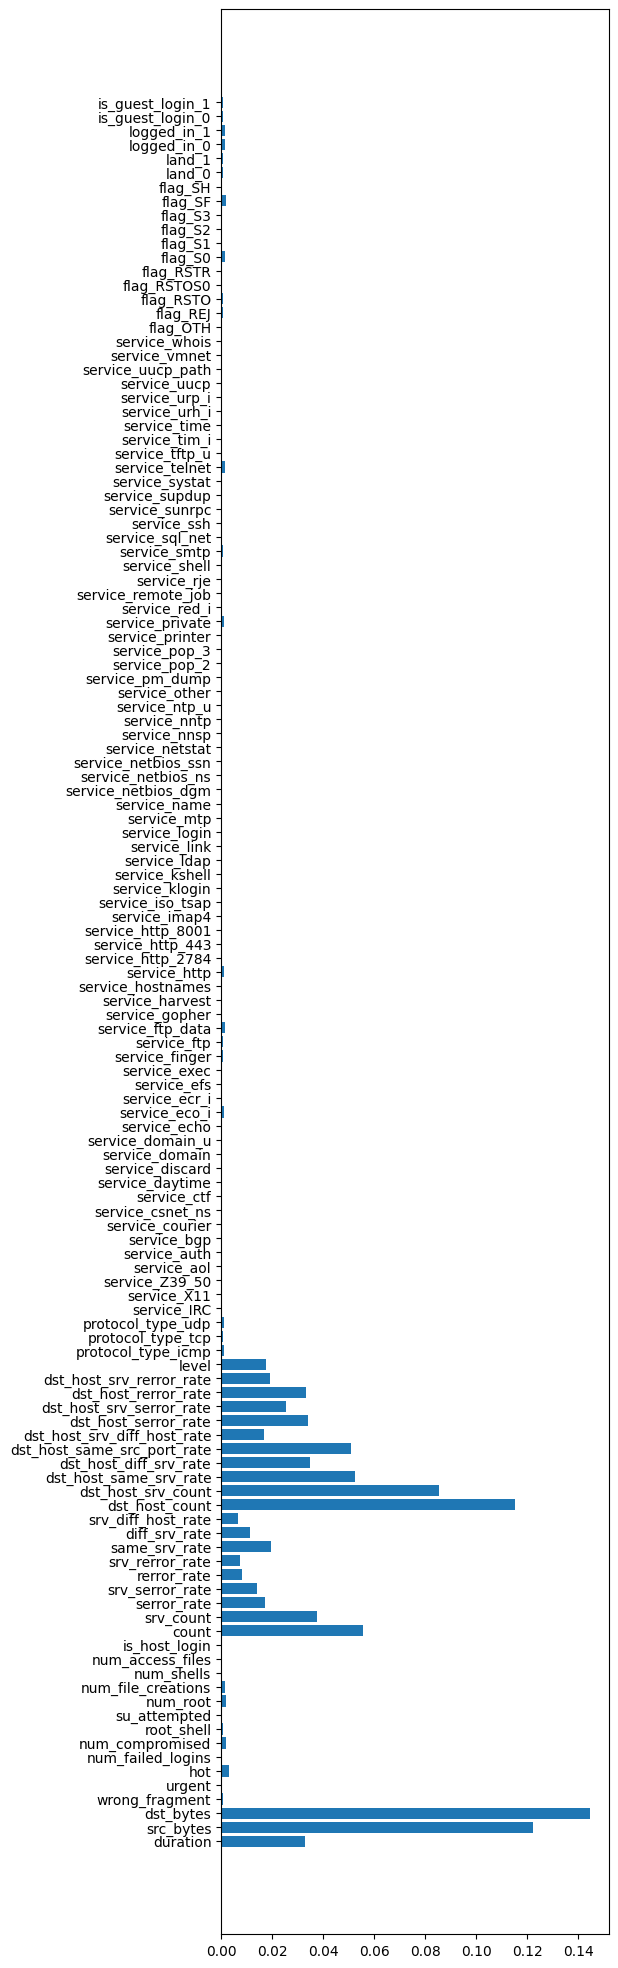

In [25]:
plt.figure(figsize=(5,25))
plt.barh(cols,data[:,1])
plt.show()

**Sensitivity of each features**

In [26]:
def sensitivity_analysis(model, X, y, perturbation):
    sensitivities = {i: [] for i in range(X.shape[1])}
    for sample_idx in range(0, X.shape[0]):
        baseline_prediction = model.predict(X[sample_idx].reshape(1, -1))[0]

        for i in range(X.shape[1]):  # Iterate over each feature
            # Perturb the feature
            perturbed_X = X[sample_idx].copy()
            perturbed_X[i] += perturbation[i]  # Increase the feature

            # Get the prediction after perturbation
            perturbed_prediction = model.predict(perturbed_X.reshape(1, -1))[0]
            sensitivity = abs(perturbed_prediction - baseline_prediction)
            if abs(sensitivity) == abs(np.inf):
                continue
            sensitivities[i].append(sensitivity)
            # Also, check effect of decreasing the feature
            perturbed_X[i] -= 2 * perturbation[i]  # Decrease the feature
            perturbed_prediction_decrease = model.predict(perturbed_X.reshape(1, -1))[0]
            sensitivity_decrease = abs(perturbed_prediction_decrease - baseline_prediction)
            if abs(sensitivity_decrease) == abs(np.inf):
                continue
            sensitivities[i].append(sensitivity_decrease)
    avg_sensitivities = {i: np.mean(sensitivities[i]) for i in sensitivities}
    return avg_sensitivities

In [27]:
sensitivity = sensitivity_analysis(clf, X_train, y_train, np.mean(X_train,axis=0)*0.1)

In [28]:
print(sensitivity)

{0: 0.971938010478593, 1: 0.8710727327253162, 2: 0.008476370243618466, 3: 0.031162347628203996, 4: 7.938328011713444e-05, 5: 0.5241766189778961, 6: 9.70240090320532e-05, 7: 0.0006968087921392912, 8: 7.938328011713444e-05, 9: 7.938328011713444e-05, 10: 0.030712509040873567, 11: 0.0, 12: 0.015056362128883165, 13: 0.0, 14: 0.00017640728914918765, 15: 0.08017711291830579, 16: 0.014897595568648897, 17: 0.03146665020198634, 18: 0.0001411258313193501, 19: 0.0024873427770035457, 20: 0.0, 21: 0.0003043025737823487, 22: 0.00021168874697902518, 23: 0.00023373965812267363, 24: 0.0023021151233968986, 25: 0.0016714590646885528, 26: 0.07807345599520173, 27: 0.0007894226189426147, 28: 0.052794291460123134, 29: 0.0018743274472101186, 30: 0.0006262458764796161, 31: 0.06876356131035334, 32: 0.0005909644186497786, 33: 0.00015876656023426888, 34: 0.033587947854005325, 35: 4.410182228729691e-06, 36: 0.05885829202462646, 37: 0.007603154162329987, 38: 0.00017640728914918765, 39: 7.938328011713444e-05, 40: 9.7

In [29]:
result = sensitivity.items()
data = np.array(list(result))

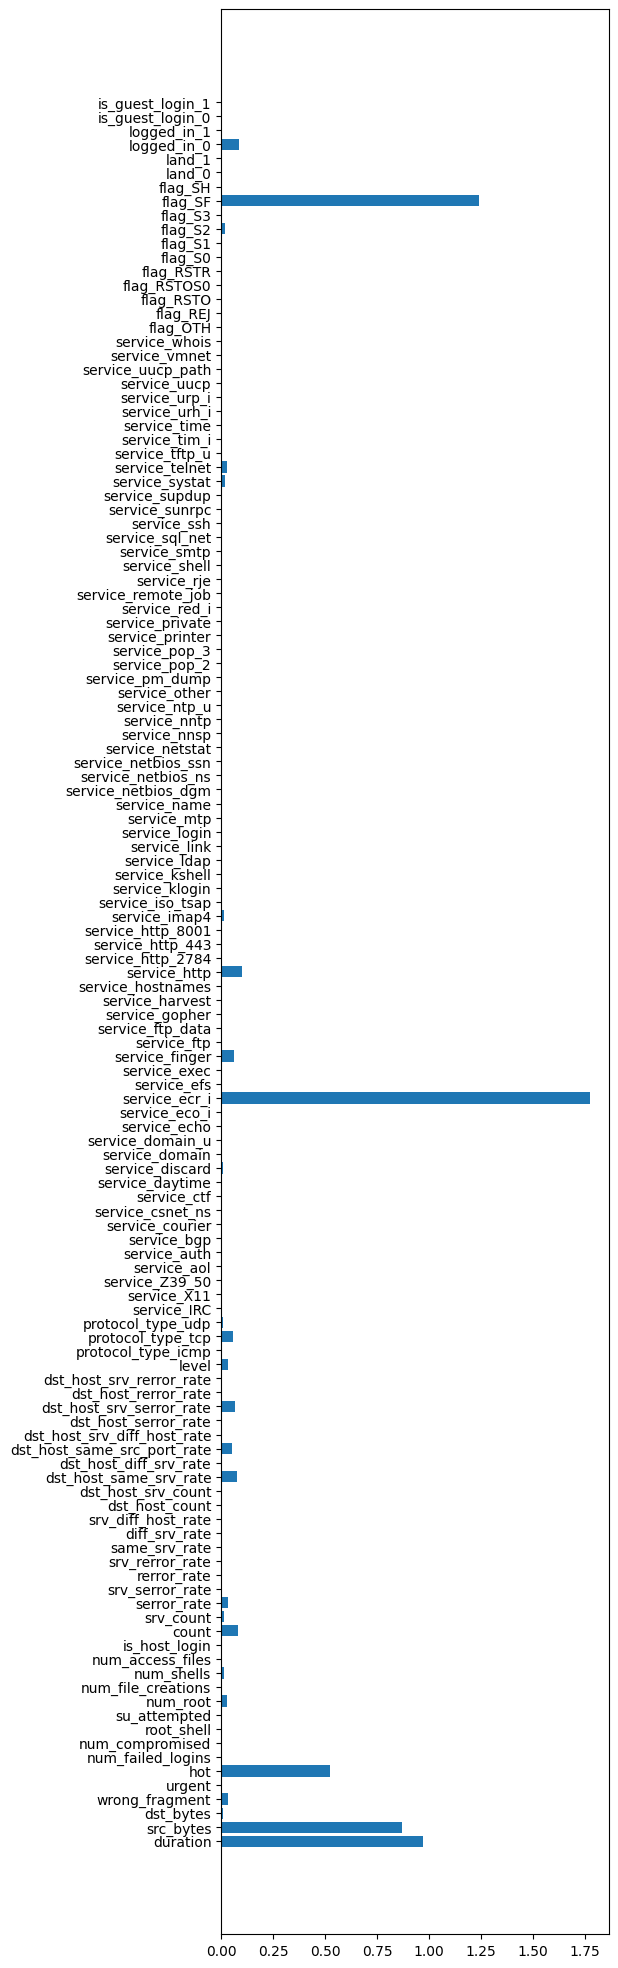

In [30]:
plt.figure(figsize=(5,25))
plt.barh(cols,data[:,1])
plt.show()

**Running the Random Forest for the parameter which gave best precision in the Decsion Tree**

In [ ]:
acc_arr = []
prec_arr = []
rec_arr = []
f1_arr = []
for i in range(1,7):
    clf = RandomForest(min_samples_split=2, max_depth=50, n_trees=i)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    acc_arr.append(accuracy_score(prediction,y_test))
    prec_arr.append(precision_score(prediction, y_test, average="macro", zero_division=np.nan))
    rec_arr.append(recall_score(prediction, y_test, average="macro", zero_division=np.nan))
    f1_arr.append(f1_score(prediction, y_test, average="macro", zero_division=np.nan))

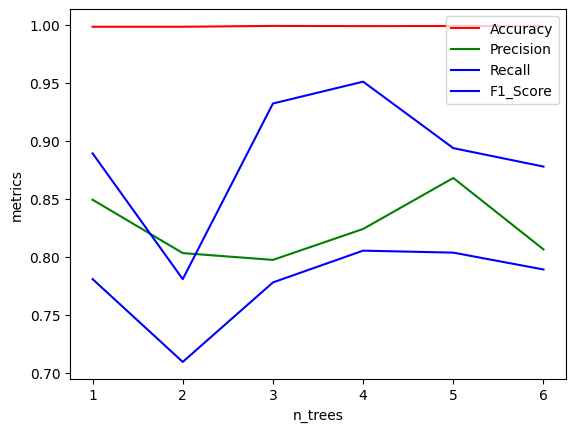

In [36]:
plt.figure()
plt.plot(range(1,7), acc_arr,color='r')
plt.plot(range(1,7), prec_arr,color='g')
plt.plot(range(1,7), rec_arr,color='b')
plt.plot(range(1,7), f1_arr, color="b")
plt.xlabel('n_trees')
plt.ylabel('metrics')
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1_Score'], loc='upper right')
plt.show()

**Balanced Random Forest**

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=1000)
brf.fit(X_train, y_train)
prediction = brf.predict(X_test)

acc = accuracy_score(prediction,y_test)
prec = precision_score(prediction, y_test, average="macro", zero_division=np.nan)
rec = recall_score(prediction, y_test, average="macro", zero_division=np.nan)
f1 = f1_score(prediction, y_test, average="macro", zero_division=np.nan)

c:\Users\maniv\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\maniv\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\maniv\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

In [19]:
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score : ", f1)

Accuracy:  0.7669471344657882
Precision:  0.7546423562474588
Recall:  0.33324275751577676
F1 Score :  0.3668899391447109
